# Generating Y Variable

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi

%matplotlib inline

In [2]:
# Load .env environment variables
load_dotenv()

True

In [3]:
# Set Alpaca API key and secret
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

In [4]:
# Verify that Alpaca key and secret were correctly loaded
print(f"Alpaca Key type: {type(alpaca_api_key)}")
print(f"Alpaca Secret Key type: {type(alpaca_secret_key)}")

Alpaca Key type: <class 'str'>
Alpaca Secret Key type: <class 'str'>


In [5]:
# Create the Alpaca API object
alpaca = tradeapi.REST(
    alpaca_api_key,
    alpaca_secret_key,
    api_version="v2")

In [6]:
# Format current date as ISO format
today = pd.Timestamp("2021-01-14", tz="America/New_York").isoformat()

In [7]:
# Set the tickers
tickers = ["TSLA", "QQQ"]

In [8]:
# Set timeframe to one day ('1D') for the Alpaca API
timeframe = "1D"

In [9]:
# Format start and end dates as ISO format for one year period
start = pd.Timestamp("2010-06-29", tz="America/New_York").isoformat()
end = today

In [10]:
# Get closing prices for TWTR and QQQ from the last year
df_portfolio_year = alpaca.get_barset(
    tickers,
    timeframe,
    start = start,
    end = end
).df

# Display sample data
df_portfolio_year.head(10)

QQQ                                     TSLA  \
                            open   high    low  close     volume     open   
time                                                                        
2010-06-29 00:00:00-04:00  44.42  44.46  43.07  43.40  122444896  19.0000   
2010-06-30 00:00:00-04:00  43.26  43.67  39.07  39.16   91124497  25.8800   
2010-07-01 00:00:00-04:00  42.82  42.96  41.77  42.58  139969730  25.0000   
2010-07-02 00:00:00-04:00  39.12  39.26  38.59  38.94   68320988  23.0000   
2010-07-06 00:00:00-04:00  43.09  43.37  42.25  42.60   75246089  20.0000   
2010-07-07 00:00:00-04:00  42.74  44.01  42.70  43.96   66204299  16.4000   
2010-07-08 00:00:00-04:00  44.30  44.38  43.68  44.18   64082460  16.1400   
2010-07-09 00:00:00-04:00  44.18  44.63  44.08  44.60   43646249  17.5200   
2010-07-12 00:00:00-04:00  44.58  45.03  44.46  44.75   55648409  17.9600   
2010-07-13 00:00:00-04:00  45.13  45.50  44.80  45.33   72782445  17.3938   

                                                            
                              high    low  close    volume  
time                                                        
2010-06-29 00:00:00-04:00  25.0000  17.54  23.94  18586286  
2010-06-30 00:00:00-04:00  30.4192  23.30  23.63  16740222  
2010-07-01 00:00:00-04:00  25.9200  20.27  21.90   8045449  
2010-07-02 00:00:00-04:00  23.1000  18.71  19.20   4977765  
2010-07-06 00:00:00-04:00  20.0000  15.83  15.98   6640566  
2010-07-07 00:00:00-04:00  16.6300  14.98  15.74   6805662  
2010-07-08 00:00:00-04:00  17.5200  15.57  17.46   7534993  
2010-07-09 00:00:00-04:00  17.9000  16.55  17.33   3241859  
2010-07-12 00:00:00-04:00  18.0700  17.00  17.00   1724816  
2010-07-13 00:00:00-04:00  18.4500  16.90  18.07   2158008

In [11]:
# Create and empty DataFrame for closing prices
df_closing_prices = pd.DataFrame()

# Fetch the closing prices of FB and TWTR
df_closing_prices["TSLA"] = df_portfolio_year["TSLA"]["close"]
df_closing_prices["QQQ"] = df_portfolio_year["QQQ"]["close"]

# Drop the time component of the date
df_closing_prices.index = df_closing_prices.index.date

# Display sample data
df_closing_prices.head(100)

,TSLA,QQQ
2010-06-29,23.9400,43.40
2010-06-30,23.6300,39.16
2010-07-01,21.9000,42.58
2010-07-02,19.2000,38.94
2010-07-06,15.9800,42.60
...,...,...
2010-11-11,28.0000,49.05
2010-11-12,29.7600,48.25
2010-11-15,30.8000,48.07
2010-11-16,29.6899,47.28


In [12]:
# Compute daily returns
df_daily_returns = df_closing_prices.pct_change().dropna()
df_daily_returns['Differential']=df_daily_returns['TSLA']-df_daily_returns['QQQ']
# Display sample data
df_daily_returns.head()

,TSLA,QQQ,Differential
2010-06-30,-0.012949,-0.097696,0.084747
2010-07-01,-0.073212,0.087334,-0.160546
2010-07-02,-0.123288,-0.085486,-0.037802
2010-07-06,-0.167708,0.093991,-0.261699
2010-07-07,-0.015019,0.031925,-0.046944


<AxesSubplot:title={'center':'Daily Returns Differential of TSLA and QQQ since June 29, 2010'}>

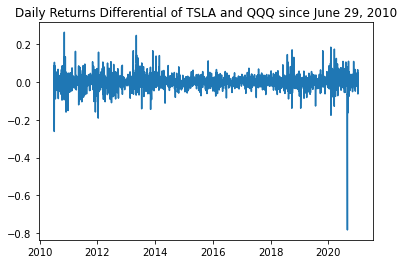

In [13]:
# Plot daily returns
df_daily_returns['Differential'].plot(title="Daily Returns Differential of TSLA and QQQ since June 29, 2010")